## mplstyle and DRY for storytelling in matplotlib

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import duckdb

plt.style.use("styles/base.mplstyle")

df = pd.read_csv("data/jobs_in_data_2024.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'data/jobs_in_data_2024.csv'

In [ ]:
df.shape

(14199, 12)

In [ ]:
df_job_categories = df["job_category"].value_counts()
df_job_categories

job_category
Data Science and Research         4675
Data Engineering                  3157
Data Analysis                     2204
Machine Learning and AI           2148
Leadership and Management          791
BI and Visualization               600
Data Architecture and Modeling     419
Data Management and Strategy       115
Data Quality and Operations         79
Cloud and Database                  11
Name: count, dtype: int64

In [ ]:
type(df_job_categories)

pandas.core.series.Series

## visualizations

{'coolness': 'supahcool'}
default title


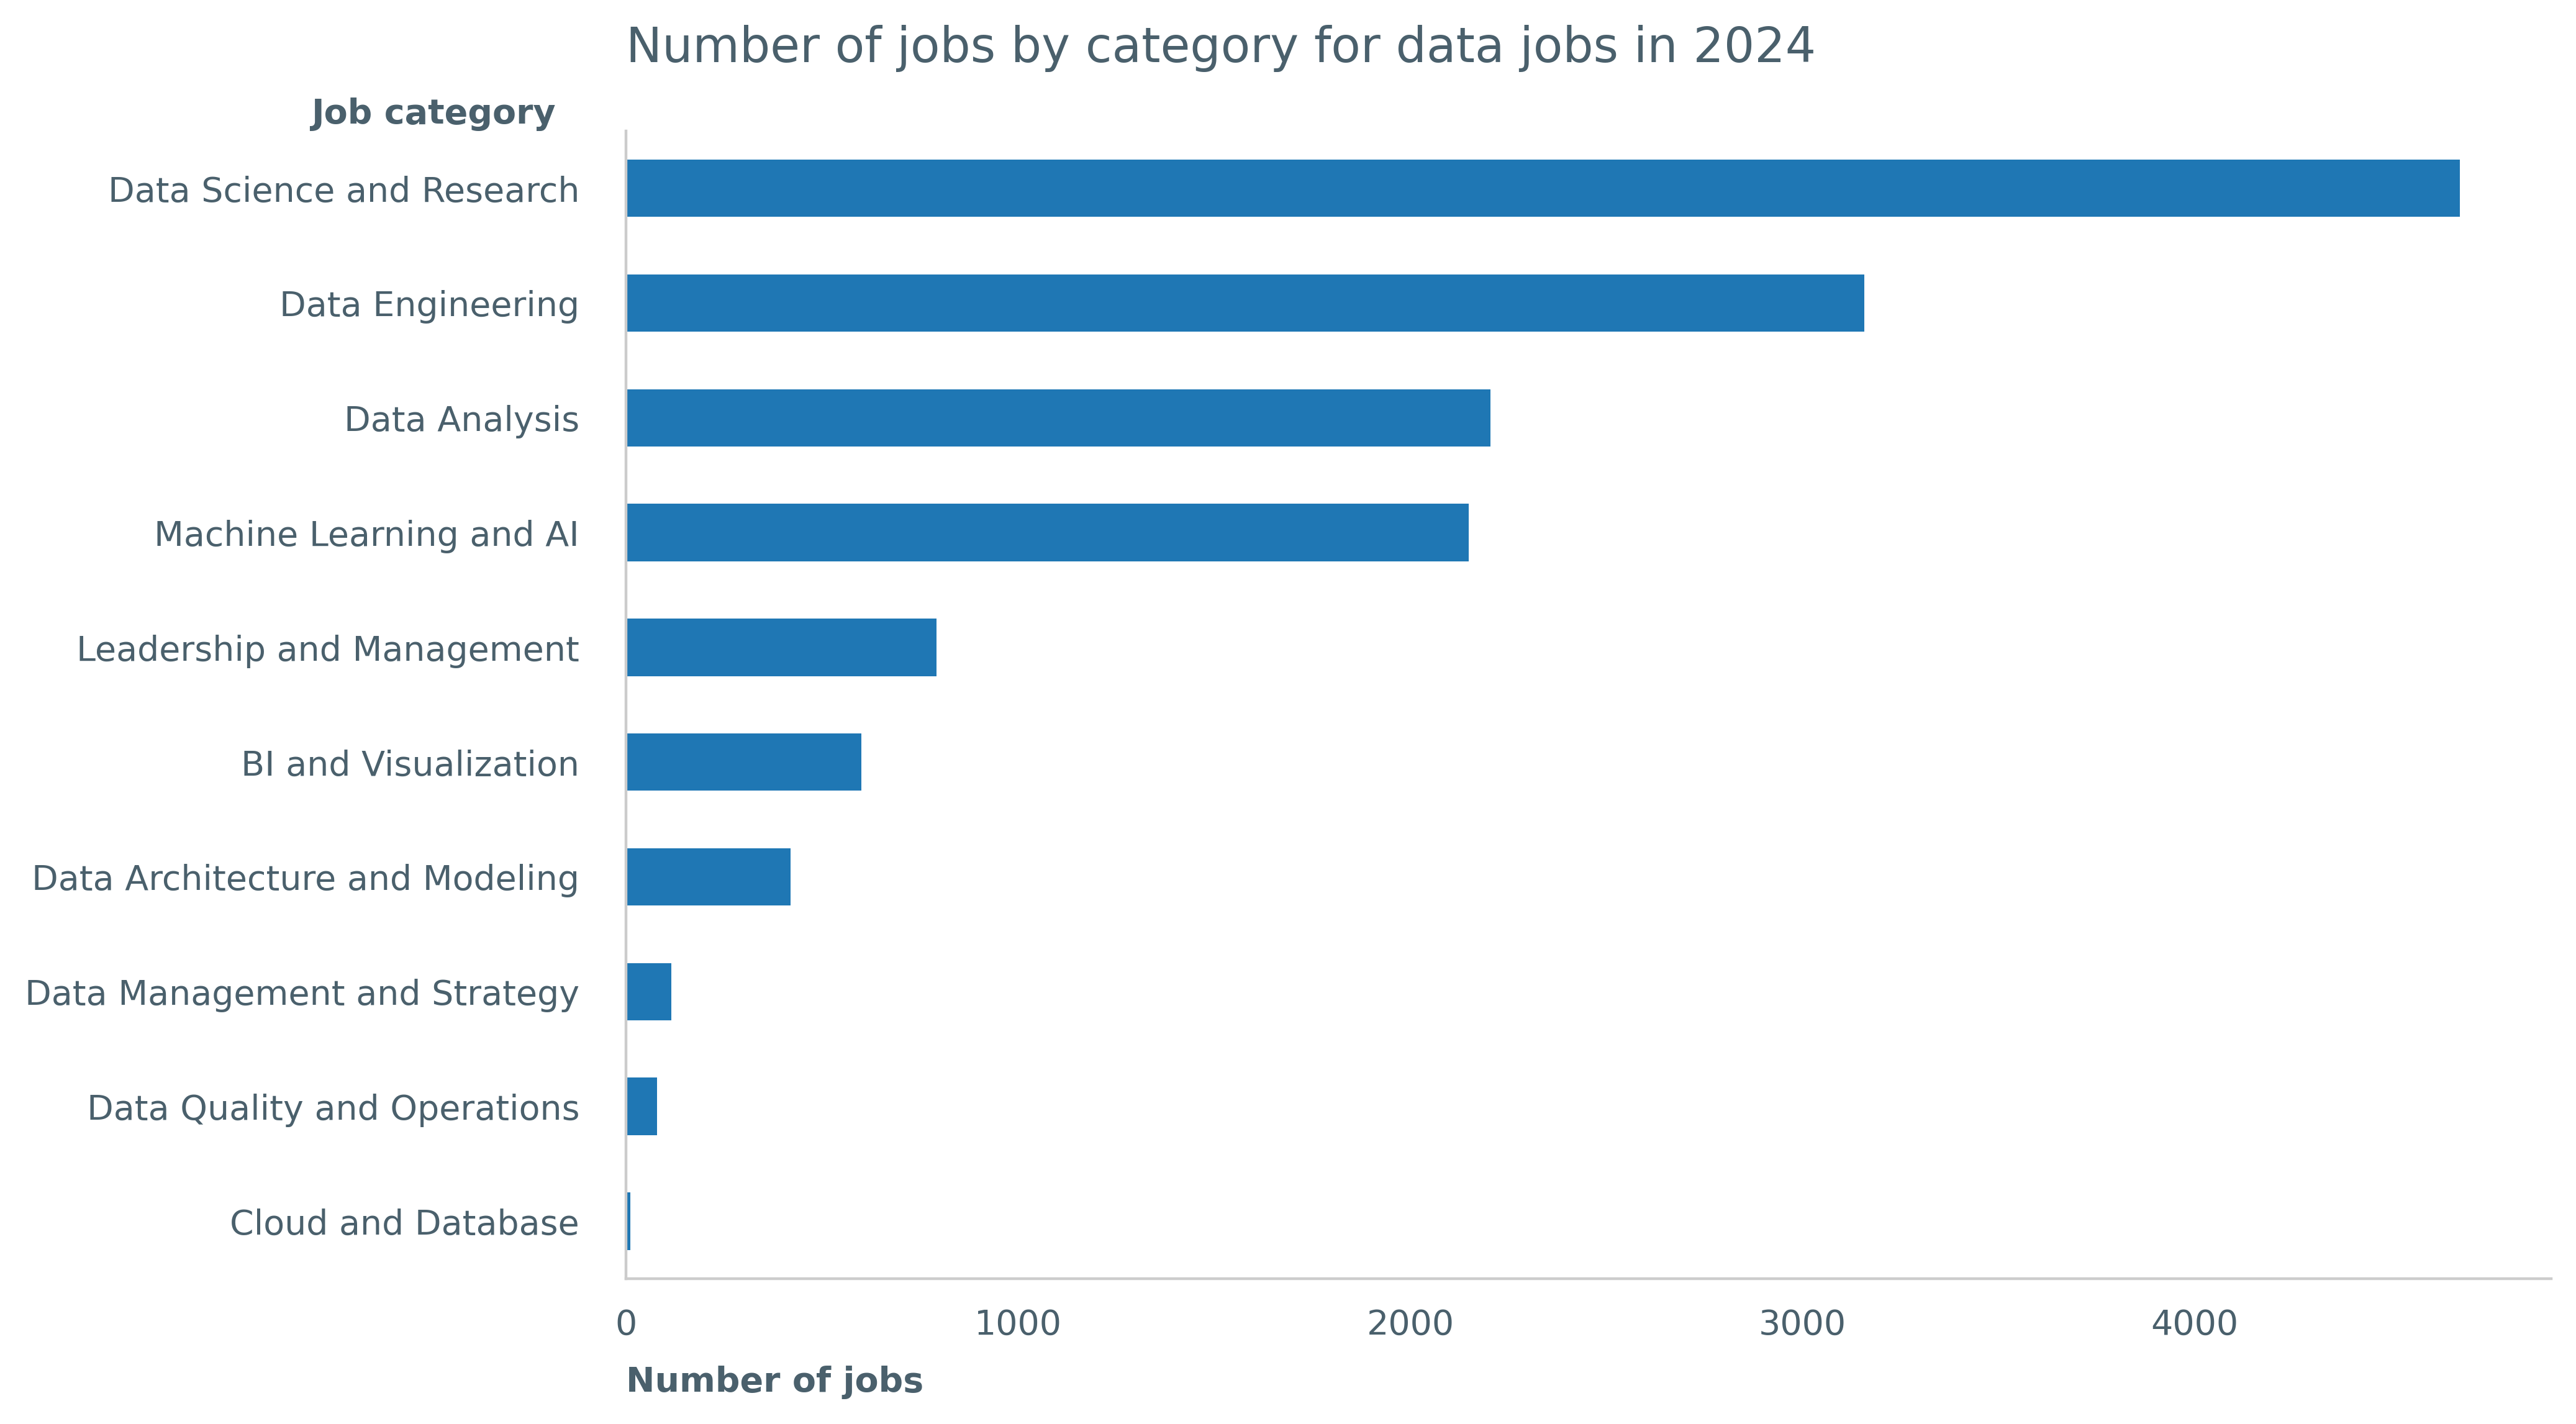

In [ ]:
from charts_utils import horizontal_bar_options, save_fig_from_ax, thousands_formatter
from constants import BLUE_1, GRAY_1

colors = [GRAY_1] * len(df_job_categories)
colors[:4] = [BLUE_1] * 4

ax = df_job_categories.plot(kind="barh", ylabel="JOB CATEGORY", color=colors, width=0.6)

ax = horizontal_bar_options(
    ax,
    title="The top job categories within the data field 2024 are "
    + r"$\bf{data\ science},$"
    + "\n"
    + r"$\bf{data\ engineering},$"
    + r"$\bf{\ data\ analysis\ \text{and}\ machine\ learning}$",
    title_pad=22,
    xlabel="# OF JOBS",
    ylabel="JOB CATEGORY",
)

save_fig_from_ax(ax, save_path="figures/number_data_jobs.png")

In [ ]:
df_salary = (
    duckdb.query(
        """
    SELECT 
        job_category, 
        CAST(AVG(salary_in_usd) AS INT) AS avg_salary_usd
    FROM 
        df
    GROUP BY 
        job_category
    ORDER BY avg_salary_usd DESC             
"""
    )
    .df()
    .set_index("job_category")
)

df_salary


In [ ]:
colors = [GRAY_1] * len(df_salary)
colors[3] = BLUE_1

ax = df_salary["avg_salary_usd"].plot(kind="barh", color=colors, width=0.6)

ax = horizontal_bar_options(
    ax,
    title=r"$\bf{Data\ engineers}$"
    + " is both an extremely interesting field and also \none that tops the salary",
    title_pad=20,
    xlabel="YEARLY SALARY IN USD",
    ylabel="JOB CATEGORY",
)

ax = thousands_formatter(ax)


save_fig_from_ax(ax, save_path="figures/salary_data_jobs.png")